# Classifying Names with a Character-level RNN


Reference: Xueyao Zhang


In [7]:
import os
!unzip names.zip -d names.
dataset_dir = '/content/names'
os.listdir(dataset_dir)

Archive:  names.zip
  inflating: names/Arabic.txt        
  inflating: names/Chinese.txt       
  inflating: names/Czech.txt         
  inflating: names/Dutch.txt         
  inflating: names/English.txt       
  inflating: names/French.txt        
  inflating: names/German.txt        
  inflating: names/Greek.txt         
  inflating: names/Irish.txt         
  inflating: names/Italian.txt       
  inflating: names/Japanese.txt      
  inflating: names/Korean.txt        
  inflating: names/Polish.txt        
  inflating: names/Portuguese.txt    
  inflating: names/Russian.txt       
  inflating: names/Scottish.txt      
  inflating: names/Spanish.txt       
  inflating: names/Vietnamese.txt    


['Portuguese.txt',
 'Dutch.txt',
 'Czech.txt',
 'Vietnamese.txt',
 'Korean.txt',
 'Japanese.txt',
 'Chinese.txt',
 'Irish.txt',
 'Russian.txt',
 'Arabic.txt',
 'Polish.txt',
 'Scottish.txt',
 'German.txt',
 'English.txt',
 'Greek.txt',
 'Spanish.txt',
 'Italian.txt',
 'French.txt']

In [11]:
lang2names = dict()
for file in os.listdir(dataset_dir):
  language = file.split('.')[0]
  with open(os.path.join(dataset_dir, file), 'r') as f:
    lines = f.readlines()
    lang2names[language] = [l.strip() for l in lines]
  print('{}: {}'.format(language, len(lines)))

Portuguese: 74
Dutch: 297
Czech: 519
Vietnamese: 73
Korean: 94
Japanese: 991
Chinese: 268
Irish: 232
Russian: 9408
Arabic: 2000
Polish: 139
Scottish: 100
German: 724
English: 3668
Greek: 203
Spanish: 298
Italian: 709
French: 277


In [16]:
import random

for lang, names in lang2names.items():
  samples = random.sample(names, 5)
  print('{}:\t {}'.format(lang, '\t'.join(samples)))

Portuguese:	 Araújo	Cruz	Gomes	Guerra	Henriques
Dutch:	 Nelissen	Romijn	Sneiders	Roijackers	Zee
Czech:	 Macikova	Hnizdil	Kupfel	Biganska	Dejmal
Vietnamese:	 Trang	Ma	an	Dam	Ha
Korean:	 Ron	Youn	Chang	Choe	Ma
Japanese:	 Ashikaga	Kimio	Nakatoni	Fuse	Sonoda
Chinese:	 Ou-Yang	Woo	Ling	Chew	Shuai
Irish:	 O'Malley	Dalach	Bradach	Seaghdha	Mclain
Russian:	 Tzarenkov	Zingerman	Talzi	Juchenko	Awerotchkin
Arabic:	 Mansour	Safar	Shamoun	Kattan	Srour
Polish:	 Sierzant	Nosek	Brzezicki	Sokolsky	Chlebek
Scottish:	 Wright	Wilson	Hay	Macdonald	Walker
German:	 West	Breitbarth	Schnur	Engel	Rier
English:	 Ricketts	Dobbins	Hamill	Lawlor	Adler
Greek:	 Anetakis	Dioletis	Karnoupakis	Taflambas	Pantelakos
Spanish:	 Vives	Rivero	Maradona	Sanchez	Villalobos
Italian:	 Pontecorvo	Gentile	Brioschi	Giùgovaz	Sarto
French:	 Roche	Paternoster	Marie	Delacroix	Firmin


In [17]:
# Total size
print('There are {} languages'.format(len(lang2names)))
print('Total size: {}'.format(sum([len(names) for names in lang2names.values()])))

There are 18 languages
Total size: 20074


In [18]:
val_ratio = 0.1
test_ratio = 0.1

X_train = []
X_val = []
X_test = []

y_train = []
y_val = []
y_test = []

for lang, names in lang2names.items():
  # Shuffle the names
  random.shuffle(names)

  sz = len(names)
  val_sz = int(len(names) * val_ratio)
  test_sz = int(len(names) * test_ratio)
  train_sz = sz - val_sz - test_sz

  X_train += names[:train_sz]
  X_val += names[train_sz:train_sz+val_sz]
  X_test += names[-test_sz:]

  y_train += [lang] * train_sz
  y_val += [lang] * val_sz
  y_test += [lang] * test_sz


# Check
assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)
assert len(X_test) == len(y_test)

a, b, c = len(X_train), len(X_val), len(X_test)
print('Train: {}, Val: {}, Test: {}'.format(a, b, c))
print('Total: {}'.format(a+b+c))
print('Train/Val/Test = {:.2f} : {:.2f} : {:.2f}'.format(a/c, b/c, 1))

Train: 16078, Val: 1998, Test: 1998
Total: 20074
Train/Val/Test = 8.05 : 1.00 : 1.00


In [23]:
from collections import defaultdict

char2sz = defaultdict(int)
for name in X_train + X_val + X_test:
  for char in name:
    char2sz[char.lower()] += 1

len(char2sz)

58

In [24]:
char2sz = sorted(char2sz.items(), key=lambda x:x[1], reverse=True)
char2sz

[('a', 16516),
 ('o', 11106),
 ('e', 10764),
 ('i', 10422),
 ('n', 9961),
 ('r', 8262),
 ('s', 7985),
 ('h', 7688),
 ('k', 6922),
 ('l', 6713),
 ('v', 6315),
 ('t', 5956),
 ('u', 4720),
 ('m', 4351),
 ('d', 3899),
 ('b', 3657),
 ('y', 3619),
 ('g', 3217),
 ('c', 3070),
 ('z', 1932),
 ('f', 1778),
 ('p', 1711),
 ('j', 1351),
 ('w', 1127),
 (' ', 115),
 ('q', 98),
 ("'", 87),
 ('x', 73),
 ('-', 25),
 ('ö', 24),
 ('é', 23),
 ('í', 14),
 ('ó', 13),
 ('á', 13),
 ('ä', 13),
 ('ü', 11),
 ('à', 10),
 ('ß', 9),
 ('ú', 7),
 ('ñ', 6),
 ('1', 3),
 (',', 3),
 ('ś', 3),
 ('ò', 3),
 ('ã', 2),
 ('ż', 2),
 ('è', 2),
 ('õ', 1),
 ('/', 1),
 ('\xa0', 1),
 ('ą', 1),
 ('ń', 1),
 ('ł', 1),
 ('ì', 1),
 ('ê', 1),
 ('ç', 1),
 (':', 1),
 ('ù', 1)]

In [25]:
char2idx = dict()

idx = 0
for char, sz in char2sz:
  if sz >= 50:
    char2idx[char] = idx
    idx += 1
  else:
    char2idx[char] = idx

len(char2idx)

58

In [29]:
# Sequence lengths' statistics
import pandas as pd

df = pd.DataFrame({'character_num': [len(name) for name in X_train + X_val + X_test]})
df

,character_num
0,5
1,7
2,4
3,6
4,6
...,...
20069,7
20070,7
20071,7
20072,7


In [27]:
df.describe()

,character_num
count,20074.000000
mean,7.154130
std,2.102267
min,2.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,20.000000


In [30]:
import torch

# The padding idx is 58
padding_idx = len(char2idx)

def tensorize_X(X, max_seq_len=20):
  sz = len(X)
  tensor = torch.zeros((sz, max_seq_len), dtype=torch.long) + padding_idx
  mask = torch.zeros((sz, max_seq_len, 1), dtype=torch.long)

  for i, name in enumerate(X):
    l = min(len(name), max_seq_len)
    tensor[i][:l] = torch.as_tensor([char2idx[c.lower()] for c in name[:l]])
    mask[i][:l] = 1

  return tensor, mask

In [31]:
X_train, mask_train = tensorize_X(X_train)
X_val, mask_val = tensorize_X(X_val)
X_test, mask_test = tensorize_X(X_test)

In [32]:
X_train.shape, X_val.shape, X_test.shape

(torch.Size([16078, 20]), torch.Size([1998, 20]), torch.Size([1998, 20]))

In [33]:
X_train, X_val, X_test

(tensor([[ 5,  1, 13,  ..., 58, 58, 58],
         [20,  5,  2,  ..., 58, 58, 58],
         [15,  2,  9,  ..., 58, 58, 58],
         ...,
         [ 9,  2, 15,  ..., 58, 58, 58],
         [ 5,  3, 18,  ..., 58, 58, 58],
         [ 7,  2,  5,  ..., 58, 58, 58]]),
 tensor([[14,  2,  9,  ..., 58, 58, 58],
         [14, 12,  0,  ..., 58, 58, 58],
         [21,  0,  9,  ..., 58, 58, 58],
         ...,
         [ 7, 28, 15,  ..., 58, 58, 58],
         [18,  1, 12,  ..., 58, 58, 58],
         [ 9,  3,  4,  ..., 58, 58, 58]]),
 tensor([[ 0,  9, 13,  ..., 58, 58, 58],
         [ 6,  1, 12,  ..., 58, 58, 58],
         [20,  2,  5,  ..., 58, 58, 58],
         ...,
         [ 9,  2, 15,  ..., 58, 58, 58],
         [ 1,  9,  3,  ..., 58, 58, 58],
         [15,  2,  5,  ..., 58, 58, 58]]))

In [34]:
lang2idx = {lang:idx for idx, lang in enumerate(lang2names)}
lang2idx

{'Portuguese': 0,
 'Dutch': 1,
 'Czech': 2,
 'Vietnamese': 3,
 'Korean': 4,
 'Japanese': 5,
 'Chinese': 6,
 'Irish': 7,
 'Russian': 8,
 'Arabic': 9,
 'Polish': 10,
 'Scottish': 11,
 'German': 12,
 'English': 13,
 'Greek': 14,
 'Spanish': 15,
 'Italian': 16,
 'French': 17}

In [35]:
def tensorize_y(y):
  y = torch.as_tensor([lang2idx[l] for l in y], dtype=torch.long)
  return y

In [36]:
y_train = tensorize_y(y_train)
y_val = tensorize_y(y_val)
y_test = tensorize_y(y_test)

In [37]:
y_train.shape, y_val.shape, y_test.shape

(torch.Size([16078]), torch.Size([1998]), torch.Size([1998]))

In [38]:
y_train, y_val, y_test

(tensor([ 0,  0,  0,  ..., 17, 17, 17]),
 tensor([ 0,  0,  0,  ..., 17, 17, 17]),
 tensor([ 0,  0,  0,  ..., 17, 17, 17]))

In [40]:
for t in ['train', 'val', 'test']:
  path = os.path.join('./names', '{}.pt'.format(t))
  torch.save({'X': eval('X_{}'.format(t)), 'y': eval('y_{}'.format(t)), 'mask': eval('mask_{}'.format(t))}, path)

In [42]:
n_letters = len(char2idx) + 1
n_categories = len(lang2idx)
n_letters, n_categories

(59, 18)

In [43]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, padding_idx, embedding_dim, hidden_size, output_size):
      super(RNN, self).__init__()

      self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
      self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
      self.linear = nn.Linear(hidden_size, output_size)
      self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, X, mask):
      """
      Args:
        X: (batch, seq_len)
        mask: (batch, seq_len, 1)
      Returns:
        output: (batch, output_size)
      """

      # (batch, seq_len, embedding_dim)
      input = self.embedding(X)
      # (batch, seq_len, hidden_size)
      rnn_output, _ = self.rnn(input)
      # (batch, hidden_size) Note: https://pytorch.org/docs/stable/generated/torch.sum.html
      mean_pooling = torch.sum(rnn_output * mask, dim=1) / torch.sum(mask, dim=1)
      # (batch, output_size)
      output = self.softmax(self.linear(mean_pooling))
      return output

In [44]:
model = RNN(vocab_size=n_letters, padding_idx=n_letters-1, embedding_dim=64, hidden_size=32, output_size=n_categories)
model

RNN(
  (embedding): Embedding(59, 64, padding_idx=58)
  (rnn): RNN(64, 32, batch_first=True)
  (linear): Linear(in_features=32, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [45]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
  def __init__(self, dataset_type):
    self.dataset_type = dataset_type
    self.load_data()

  def load_data(self):
    path = os.path.join('./names', '{}.pt'.format(self.dataset_type))
    print('Loading {}...'.format(path))

    data = torch.load(path)
    self.X = data['X']
    self.y = data['y']
    self.mask = data['mask']

    if torch.cuda.is_available():
      self.X = self.X.cuda()
      self.y = self.y.cuda()
      self.mask = self.mask.cuda()

    print('X: {}, y: {}, mask: {}\n'.format(self.X.shape, self.y.shape, self.mask.shape))


  def __getitem__(self, index):
    return (self.X[index], self.y[index], self.mask[index])

  def __len__(self):
    return len(self.X)

In [46]:
train_dataset = MyDataset("train")
val_dataset = MyDataset("val")
test_dataset = MyDataset("test")

Loading ./names/train.pt...
X: torch.Size([16078, 20]), y: torch.Size([16078]), mask: torch.Size([16078, 20, 1])

Loading ./names/val.pt...
X: torch.Size([1998, 20]), y: torch.Size([1998]), mask: torch.Size([1998, 20, 1])

Loading ./names/test.pt...
X: torch.Size([1998, 20]), y: torch.Size([1998]), mask: torch.Size([1998, 20, 1])



In [47]:
from torch.utils.data import DataLoader

batch_size = 8

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

In [48]:
from torch.nn import NLLLoss
from torch.optim import Adam

lr = 1e-3

criterion = NLLLoss()
optimizer = Adam(model.parameters(), lr=lr)

In [49]:
idx2lang = {idx:lang for lang, idx in lang2idx.items()}
idx2lang

{0: 'Portuguese',
 1: 'Dutch',
 2: 'Czech',
 3: 'Vietnamese',
 4: 'Korean',
 5: 'Japanese',
 6: 'Chinese',
 7: 'Irish',
 8: 'Russian',
 9: 'Arabic',
 10: 'Polish',
 11: 'Scottish',
 12: 'German',
 13: 'English',
 14: 'Greek',
 15: 'Spanish',
 16: 'Italian',
 17: 'French'}

In [50]:
import time
import numpy as np
from sklearn.metrics import classification_report


def evaluation_of_classfication(y_pred_list, y_gt_list, print_report=False):
  classifying_ans = np.array([], dtype=int)
  classifying_pred = np.array([], dtype=int)

  for i, y_pred in enumerate(y_pred_list):
    # y_pred: (batch, category_num)
    # y_gt: (batch)
    y_gt = y_gt_list[i]

    pred = np.argmax(y_pred, axis=-1)
    ans = y_gt

    classifying_ans = np.append(classifying_ans, ans)
    classifying_pred = np.append(classifying_pred, pred)

  names = [idx2lang[i] for i in range(len(idx2lang))]
  if print_report:
    report = classification_report(classifying_ans, classifying_pred, target_names=names, digits=4, zero_division=1)
    print(report)

  report = classification_report(classifying_ans, classifying_pred, target_names=names, digits=4, output_dict=True, zero_division=1)
  return report['macro avg']['f1-score']


def evaluate(loader, model, criterion, dataset_type, print_report=False):
    print(
        "\n[{}] Eval for {} dataset\n".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())), dataset_type)
    )

    model.eval()
    eval_loss = 0.0

    y_pred_list = []
    y_gt_list = []

    with torch.no_grad():
      for step, (X, y_gt, mask) in enumerate(loader):
        # X: (batch, seq_len)
        # y_gt: (batch)
        # mask: (batch, seq_len, 1)

        # y_pred: (batch, category_num)
        y_pred = model(X, mask)
        loss = criterion(y_pred, y_gt)

        eval_loss += loss.item()
        y_pred_list.append(y_pred.cpu().numpy())
        y_gt_list.append(y_gt.cpu().numpy())

    eval_loss /= len(loader)

    # Macro F1 score
    f1_score = evaluation_of_classfication(y_pred_list, y_gt_list, print_report)
    return eval_loss, f1_score

In [51]:
!nvidia-smi

Fri Jul 26 07:29:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0              29W /  70W |    125MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [52]:
import torch
torch.cuda.is_available(), torch.cuda.device_count()

(True, 1)

In [53]:
if torch.cuda.is_available():
  model = model.cuda()
  criterion = criterion.cuda()

In [54]:
from tqdm import tqdm

epochs = 10

best_val_result = -1
best_epoch = -1
best_model = None

start = time.time()
global_step = 0
training_losses = []
eval_train_losses = []
eval_val_losses = []

for epoch in range(epochs):
  print('=' * 50)
  print(
        "Epoch: {}/{}, Time: {}\n".format(
            epoch+1, epochs, time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time()))
        )
    )
  model.train()
  lr = optimizer.param_groups[0]["lr"]

  for step, (X, y_gt, mask) in enumerate(tqdm(train_loader)):
    # X: (batch, seq_len)
    # y_gt: (batch)
    # mask: (batch, seq_len, 1)

    y_pred = model(X, mask)
    loss = criterion(y_pred, y_gt)

    if step % 10 == 0:
      # print(
      #       "Epoch: {}, Step: {}, NLL loss = {:.5f}".format(
      #           epoch + 1, global_step, loss.item()
      #       )
      #   )
      training_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    global_step += 1

  train_loss, train_f1 = evaluate(train_loader, model, criterion, 'train')
  val_loss, val_f1 = evaluate(val_loader, model, criterion, 'val')

  eval_train_losses.append(train_loss)
  eval_val_losses.append(val_loss)

  epoch_res = "\nEpoch: {}/{}, lr: {}".format(epoch + 1, epochs, lr)
  epoch_res += "\n[Loss]\nTrain: {:.8f}\tVal: {:.8f}".format(train_loss, val_loss)
  epoch_res += "\n[Macro F1 Score]\nTrain: {}\tVal: {}\n".format(train_f1, val_f1)
  print(epoch_res)

  if val_f1 > best_val_result:
    best_epoch = epoch + 1
    best_model = model
    best_val_result = val_f1

print("Training Time: {:.2f}s".format(time.time() - start))
print(
    "End time: {}".format(
        time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time()))
    )
)

Epoch: 1/10, Time: 2024-07-26 07:30:37



100%|██████████| 2010/2010 [00:05<00:00, 366.82it/s]



[2024-07-26 07:30:42] Eval for train dataset


[2024-07-26 07:30:44] Eval for val dataset


Epoch: 1/10, lr: 0.001
[Loss]
Train: 1.27398976	Val: 1.28273980
[Macro F1 Score]
Train: 0.12449972337337258	Val: 0.1271757107712865

Epoch: 2/10, Time: 2024-07-26 07:30:44



100%|██████████| 2010/2010 [00:05<00:00, 375.83it/s]



[2024-07-26 07:30:49] Eval for train dataset


[2024-07-26 07:30:51] Eval for val dataset


Epoch: 2/10, lr: 0.001
[Loss]
Train: 1.10821399	Val: 1.12444455
[Macro F1 Score]
Train: 0.17046431502219936	Val: 0.17741585266959248

Epoch: 3/10, Time: 2024-07-26 07:30:52



100%|██████████| 2010/2010 [00:08<00:00, 241.62it/s]



[2024-07-26 07:31:00] Eval for train dataset


[2024-07-26 07:31:04] Eval for val dataset


Epoch: 3/10, lr: 0.001
[Loss]
Train: 1.00839371	Val: 1.03213926
[Macro F1 Score]
Train: 0.19591964010956453	Val: 0.20698732909763562

Epoch: 4/10, Time: 2024-07-26 07:31:04



100%|██████████| 2010/2010 [00:04<00:00, 447.67it/s]



[2024-07-26 07:31:09] Eval for train dataset


[2024-07-26 07:31:11] Eval for val dataset


Epoch: 4/10, lr: 0.001
[Loss]
Train: 0.94875512	Val: 0.98562736
[Macro F1 Score]
Train: 0.23639600165466831	Val: 0.22973001368947601

Epoch: 5/10, Time: 2024-07-26 07:31:11



100%|██████████| 2010/2010 [00:04<00:00, 418.94it/s]



[2024-07-26 07:31:16] Eval for train dataset


[2024-07-26 07:31:17] Eval for val dataset


Epoch: 5/10, lr: 0.001
[Loss]
Train: 0.90411804	Val: 0.94913882
[Macro F1 Score]
Train: 0.2580676292288434	Val: 0.2380270007020602

Epoch: 6/10, Time: 2024-07-26 07:31:18



100%|██████████| 2010/2010 [00:04<00:00, 461.31it/s]



[2024-07-26 07:31:22] Eval for train dataset


[2024-07-26 07:31:24] Eval for val dataset


Epoch: 6/10, lr: 0.001
[Loss]
Train: 0.85476115	Val: 0.89936973
[Macro F1 Score]
Train: 0.2802411189475423	Val: 0.2553388660430374

Epoch: 7/10, Time: 2024-07-26 07:31:24



100%|██████████| 2010/2010 [00:04<00:00, 408.27it/s]



[2024-07-26 07:31:29] Eval for train dataset


[2024-07-26 07:31:30] Eval for val dataset


Epoch: 7/10, lr: 0.001
[Loss]
Train: 0.81640469	Val: 0.86964580
[Macro F1 Score]
Train: 0.3063577019374384	Val: 0.271782185860057

Epoch: 8/10, Time: 2024-07-26 07:31:31



100%|██████████| 2010/2010 [00:04<00:00, 452.97it/s]



[2024-07-26 07:31:35] Eval for train dataset


[2024-07-26 07:31:37] Eval for val dataset


Epoch: 8/10, lr: 0.001
[Loss]
Train: 0.78825843	Val: 0.85492135
[Macro F1 Score]
Train: 0.32014839643537807	Val: 0.2695565003204014

Epoch: 9/10, Time: 2024-07-26 07:31:37



100%|██████████| 2010/2010 [00:04<00:00, 409.65it/s]



[2024-07-26 07:31:42] Eval for train dataset


[2024-07-26 07:31:43] Eval for val dataset


Epoch: 9/10, lr: 0.001
[Loss]
Train: 0.77369013	Val: 0.84138799
[Macro F1 Score]
Train: 0.33398986865553626	Val: 0.30547130647108944

Epoch: 10/10, Time: 2024-07-26 07:31:43



100%|██████████| 2010/2010 [00:04<00:00, 466.09it/s]



[2024-07-26 07:31:48] Eval for train dataset


[2024-07-26 07:31:49] Eval for val dataset


Epoch: 10/10, lr: 0.001
[Loss]
Train: 0.74447766	Val: 0.82760986
[Macro F1 Score]
Train: 0.3503336467604962	Val: 0.33005102707699535

Training Time: 72.79s
End time: 2024-07-26 07:31:50


In [55]:
import matplotlib.pyplot as plt

def plot_losses(losses):
  plt.figure()
  plt.plot(losses)

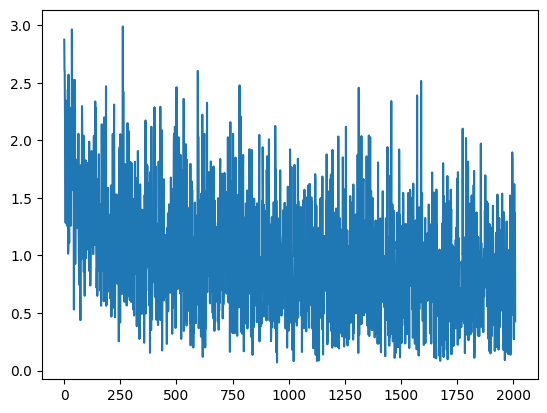

In [56]:
plot_losses(training_losses)

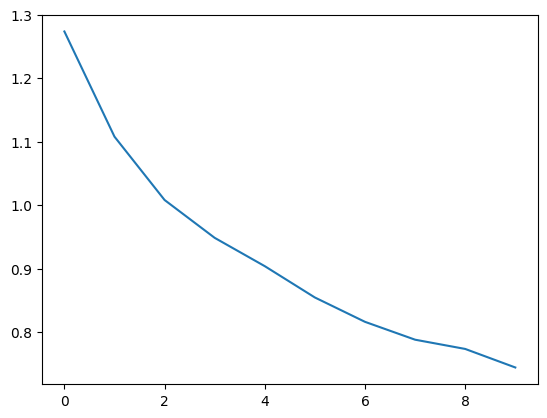

In [57]:
plot_losses(eval_train_losses)

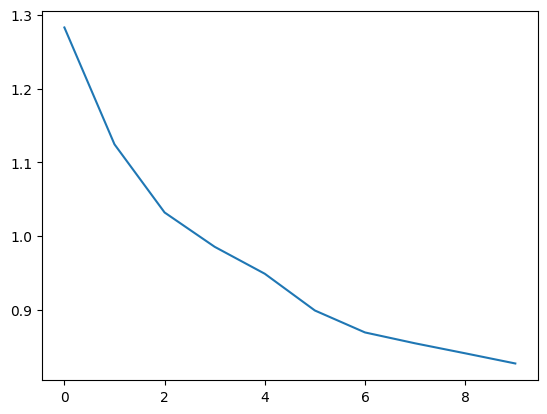

In [58]:
plot_losses(eval_val_losses)

In [59]:
best_val_result, best_epoch

(0.33005102707699535, 10)

In [60]:
best_model

RNN(
  (embedding): Embedding(59, 64, padding_idx=58)
  (rnn): RNN(64, 32, batch_first=True)
  (linear): Linear(in_features=32, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [61]:
train_loss, train_f1 = evaluate(train_loader, best_model, criterion, 'train', print_report=True)
val_loss, val_f1 = evaluate(val_loader, best_model, criterion, 'val', print_report=True)
test_loss, test_f1 = evaluate(test_loader, best_model, criterion, 'test', print_report=True)


[2024-07-26 07:33:10] Eval for train dataset

              precision    recall  f1-score   support

  Portuguese     1.0000    0.0000    0.0000        60
       Dutch     0.5714    0.0335    0.0632       239
       Czech     0.4414    0.1175    0.1856       417
  Vietnamese     1.0000    0.0000    0.0000        59
      Korean     0.4615    0.1579    0.2353        76
    Japanese     0.8245    0.7642    0.7932       793
     Chinese     0.4863    0.4120    0.4461       216
       Irish     0.7045    0.1667    0.2696       186
     Russian     0.8552    0.9563    0.9029      7528
      Arabic     0.8223    0.9456    0.8797      1600
      Polish     0.8125    0.2301    0.3586       113
    Scottish     1.0000    0.0000    0.0000        80
      German     0.4891    0.3103    0.3797       580
     English     0.6518    0.8225    0.7273      2936
       Greek     0.6429    0.1656    0.2634       163
     Spanish     0.4627    0.1292    0.2020       240
     Italian     0.6286    0.5413 